## Applying Data Science and Machine Learning concepts on this Chocolate Sales Dataset.

#### Problem Statement: Predict monthly sales based on product, country and sales person.

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("Chocolate Sales.csv")

In [3]:
df.head(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [4]:
df.shape

(3282, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


In [6]:
df.describe()

,Boxes Shipped
count,3282.000000
mean,164.666971
std,124.024736
min,1.000000
25%,71.000000
50%,137.000000
75%,232.000000
max,778.000000


#### We can see multiple features are object datatype. We need to change that to numerical data to make it so Machine Learning modelas can properly learn from the data. this step will be feature engineering.
##### We need to clean Dataset and perform EDA before that.

##### Let us check for missing and duplicate values and handle those cases accordingly.

In [7]:
df.isnull().sum()

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

##### We can see there are no null values, if there were any, we could handle it using multiple ways. like:
###### 1. using measures of central tendency(mean, median, mode)
###### 2. dropping the records with null values if they are not a lot

In [8]:
df.duplicated().sum()

0

##### No Duplicated values exist either. handling duplicate values is pretty easy as usually you jsut drop them.

##### Let us convert date and amount to numeric values as they are easier to handle. From this step we start feature engineering

In [9]:
df['Day'] = df['Date'].str.split('/').str[0].astype(int)
df['Month'] = df['Date'].str.split('/').str[1].astype(int)
df['Year'] = df['Date'].str.split('/').str[2].astype(int)

In [10]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Day,Month,Year
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180,4,1,2022
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94,1,8,2022
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91,7,7,2022
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342,27,4,2022
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184,24,2,2022


In [11]:
df['Month'].unique()

array([1, 8, 7, 4, 2, 6, 3, 5])

In [12]:
df['Year'].unique()

array([2022, 2023, 2024])

In [13]:
df.drop('Date', axis=1, inplace=True)

In [14]:
df.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,Day,Month,Year
0,Jehu Rudeforth,UK,Mint Chip Choco,"$5,320.00",180,4,1,2022
1,Van Tuxwell,India,85% Dark Bars,"$7,896.00",94,1,8,2022
2,Gigi Bohling,India,Peanut Butter Cubes,"$4,501.00",91,7,7,2022
3,Jan Morforth,Australia,Peanut Butter Cubes,"$12,726.00",342,27,4,2022
4,Jehu Rudeforth,UK,Peanut Butter Cubes,"$13,685.00",184,24,2,2022


##### Now let us handle amount

In [15]:
df['Amount_in_USD'] = df['Amount'].str.split('$').str[1].str.replace(',','').astype(float)

In [16]:
df.head()

,Sales Person,Country,Product,Amount,Boxes Shipped,Day,Month,Year,Amount_in_USD
0,Jehu Rudeforth,UK,Mint Chip Choco,"$5,320.00",180,4,1,2022,5320.0
1,Van Tuxwell,India,85% Dark Bars,"$7,896.00",94,1,8,2022,7896.0
2,Gigi Bohling,India,Peanut Butter Cubes,"$4,501.00",91,7,7,2022,4501.0
3,Jan Morforth,Australia,Peanut Butter Cubes,"$12,726.00",342,27,4,2022,12726.0
4,Jehu Rudeforth,UK,Peanut Butter Cubes,"$13,685.00",184,24,2,2022,13685.0


In [17]:
df.drop('Amount', axis=1, inplace=True)

In [18]:
df.head()

,Sales Person,Country,Product,Boxes Shipped,Day,Month,Year,Amount_in_USD
0,Jehu Rudeforth,UK,Mint Chip Choco,180,4,1,2022,5320.0
1,Van Tuxwell,India,85% Dark Bars,94,1,8,2022,7896.0
2,Gigi Bohling,India,Peanut Butter Cubes,91,7,7,2022,4501.0
3,Jan Morforth,Australia,Peanut Butter Cubes,342,27,4,2022,12726.0
4,Jehu Rudeforth,UK,Peanut Butter Cubes,184,24,2,2022,13685.0


##### Now to tackle the categorical variables
##### let's start with sales person

In [19]:
df['Sales Person'].unique()

array(['Jehu Rudeforth', 'Van Tuxwell', 'Gigi Bohling', 'Jan Morforth',
       'Oby Sorrel', 'Gunar Cockshoot', 'Brien Boise',
       'Rafaelita Blaksland', 'Barr Faughny', 'Mallorie Waber',
       'Karlen McCaffrey', "Marney O'Breen", 'Beverie Moffet',
       'Roddy Speechley', 'Curtice Advani', 'Husein Augar', 'Kaine Padly',
       'Dennison Crosswaite', "Wilone O'Kielt", 'Andria Kimpton',
       'Kelci Walkden', 'Camilla Castle', 'Madelene Upcott',
       'Dotty Strutley', 'Ches Bonnell'], dtype=object)

In [20]:
df['Country'].unique()

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

In [21]:
df['Product'].unique()

array(['Mint Chip Choco', '85% Dark Bars', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', '99% Dark & Pure', 'After Nines',
       '50% Dark Bites', 'Orange Choco', 'Eclairs', 'Drinking Coco',
       'Organic Choco Syrup', 'Milk Bars', 'Spicy Special Slims',
       'Fruit & Nut Bars', 'White Choc', 'Manuka Honey Choco',
       'Almond Choco', 'Raspberry Choco', 'Choco Coated Almonds',
       "Baker's Choco Chips", 'Caramel Stuffed Bars', '70% Dark Bites'],
      dtype=object)

##### We can see country doesn't have a lot of unique values. whereas product and sales person do. we will apply three different encoding techniques for each of them.

In [22]:
### One Hot Encoding - Country
sparse_matrix = pd.get_dummies(df['Country'], prefix='Country')
df = pd.concat([df, sparse_matrix], axis=1)

df.head()

,Sales Person,Country,Product,Boxes Shipped,Day,Month,Year,Amount_in_USD,Country_Australia,Country_Canada,Country_India,Country_New Zealand,Country_UK,Country_USA
0,Jehu Rudeforth,UK,Mint Chip Choco,180,4,1,2022,5320.0,False,False,False,False,True,False
1,Van Tuxwell,India,85% Dark Bars,94,1,8,2022,7896.0,False,False,True,False,False,False
2,Gigi Bohling,India,Peanut Butter Cubes,91,7,7,2022,4501.0,False,False,True,False,False,False
3,Jan Morforth,Australia,Peanut Butter Cubes,342,27,4,2022,12726.0,True,False,False,False,False,False
4,Jehu Rudeforth,UK,Peanut Butter Cubes,184,24,2,2022,13685.0,False,False,False,False,True,False


In [23]:
df.drop('Country', axis=1, inplace=True)

In [24]:
### Target Encoding - Product, replace product with target mean
product_target_mean = df.groupby('Product')['Amount_in_USD'].mean()

df['product_encoded'] = df['Product'].map(product_target_mean)

df.head()

,Sales Person,Product,Boxes Shipped,Day,Month,Year,Amount_in_USD,Country_Australia,Country_Canada,Country_India,Country_New Zealand,Country_UK,Country_USA,product_encoded
0,Jehu Rudeforth,Mint Chip Choco,180,4,1,2022,5320.0,False,False,False,False,True,False,6703.626296
1,Van Tuxwell,85% Dark Bars,94,1,8,2022,7896.0,False,False,True,False,False,False,6368.454933
2,Gigi Bohling,Peanut Butter Cubes,91,7,7,2022,4501.0,False,False,True,False,False,False,7051.640068
3,Jan Morforth,Peanut Butter Cubes,342,27,4,2022,12726.0,True,False,False,False,False,False,7051.640068
4,Jehu Rudeforth,Peanut Butter Cubes,184,24,2,2022,13685.0,False,False,False,False,True,False,7051.640068


In [25]:
df.drop('Product', axis=1, inplace=True)

In [26]:
### Frequency encoding - Sales person
sales_person_freq = df['Sales Person'].value_counts()

df['sales_person_encoded'] = df['Sales Person'].map(sales_person_freq)

In [27]:
df.drop('Sales Person', axis=1, inplace=True)

In [28]:
df.head()

,Boxes Shipped,Day,Month,Year,Amount_in_USD,Country_Australia,Country_Canada,Country_India,Country_New Zealand,Country_UK,Country_USA,product_encoded,sales_person_encoded
0,180,4,1,2022,5320.0,False,False,False,False,True,False,6703.626296,129
1,94,1,8,2022,7896.0,False,False,True,False,False,False,6368.454933,153
2,91,7,7,2022,4501.0,False,False,True,False,False,False,7051.640068,141
3,342,27,4,2022,12726.0,True,False,False,False,False,False,7051.640068,117
4,184,24,2,2022,13685.0,False,False,False,False,True,False,7051.640068,129


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Boxes Shipped         3282 non-null   int64  
 1   Day                   3282 non-null   int32  
 2   Month                 3282 non-null   int32  
 3   Year                  3282 non-null   int32  
 4   Amount_in_USD         3282 non-null   float64
 5   Country_Australia     3282 non-null   bool   
 6   Country_Canada        3282 non-null   bool   
 7   Country_India         3282 non-null   bool   
 8   Country_New Zealand   3282 non-null   bool   
 9   Country_UK            3282 non-null   bool   
 10  Country_USA           3282 non-null   bool   
 11  product_encoded       3282 non-null   float64
 12  sales_person_encoded  3282 non-null   int64  
dtypes: bool(6), float64(2), int32(3), int64(2)
memory usage: 160.4 KB


In [30]:
df.describe()

,Boxes Shipped,Day,Month,Year,Amount_in_USD,product_encoded,sales_person_encoded
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,164.666971,15.563985,4.576782,2023.000000,6030.338775,6030.338775,133.645338
std,124.024736,8.621738,2.315759,0.816621,4393.980200,494.946135,17.120129
min,1.000000,1.000000,1.000000,2022.000000,7.000000,4894.318869,96.000000
25%,71.000000,8.000000,3.000000,2022.000000,2521.495000,5755.939147,123.000000
50%,137.000000,15.000000,5.000000,2023.000000,5225.500000,6042.551944,135.000000
75%,232.000000,23.000000,7.000000,2024.000000,8556.842500,6368.454933,147.000000
max,778.000000,31.000000,8.000000,2024.000000,26170.950000,7051.640068,162.000000


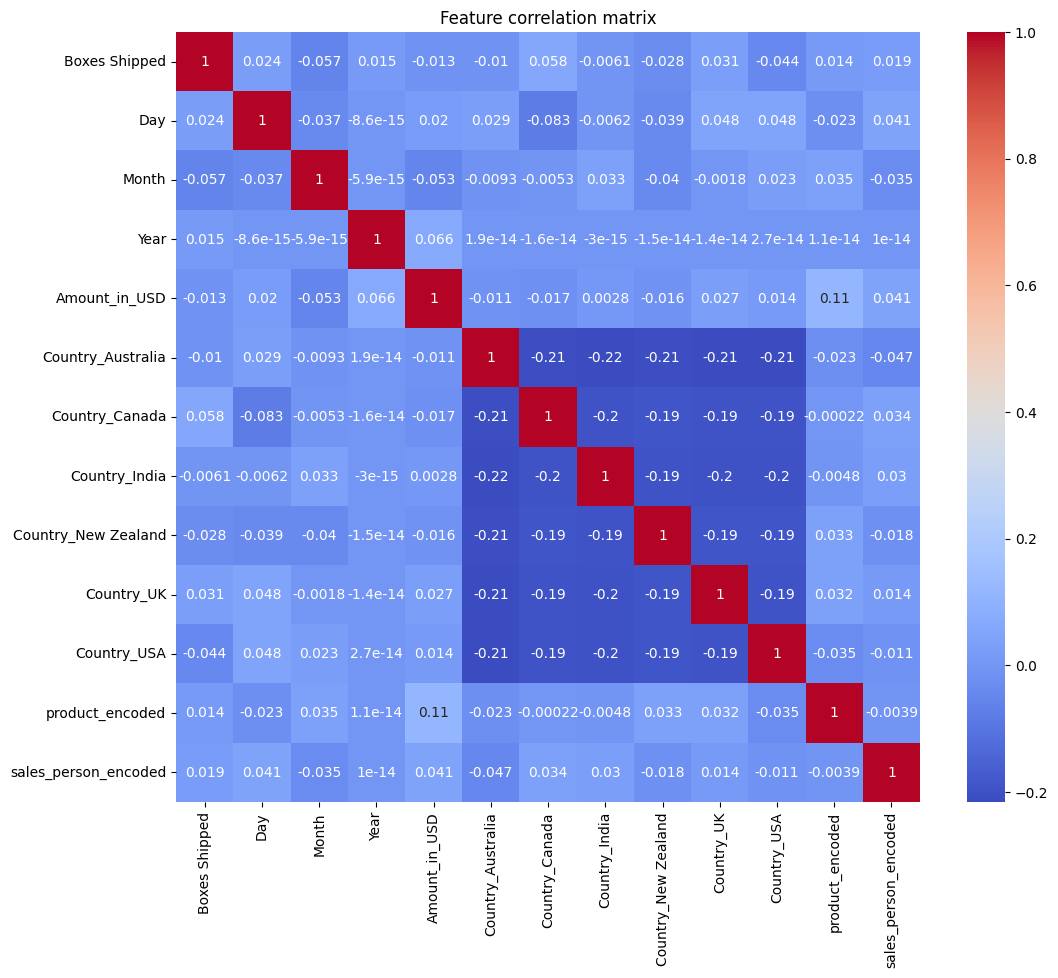

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature correlation matrix")
plt.show()

<Axes: xlabel='Boxes Shipped', ylabel='Amount_in_USD'>

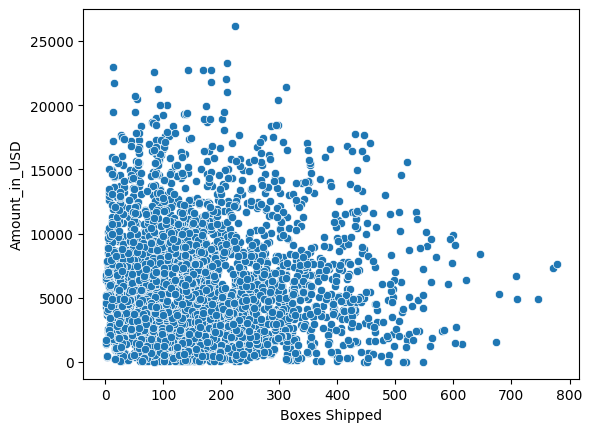

In [32]:
#bivariate
sns.scatterplot(x='Boxes Shipped', y='Amount_in_USD', data=df)

<Axes: xlabel='Month', ylabel='Amount_in_USD'>

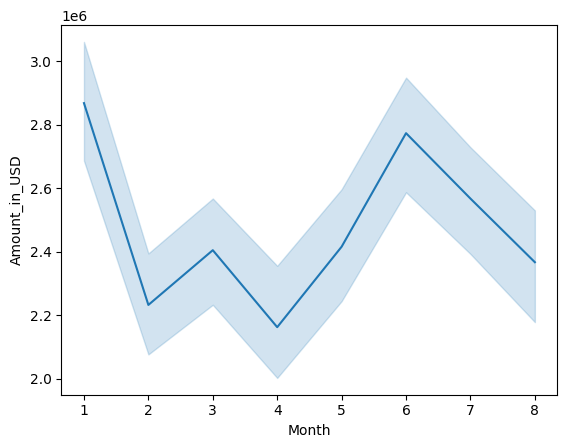

In [33]:
#Monthly sales
sns.lineplot(x='Month', y='Amount_in_USD', data=df, estimator='sum')

In [34]:
df.head()

,Boxes Shipped,Day,Month,Year,Amount_in_USD,Country_Australia,Country_Canada,Country_India,Country_New Zealand,Country_UK,Country_USA,product_encoded,sales_person_encoded
0,180,4,1,2022,5320.0,False,False,False,False,True,False,6703.626296,129
1,94,1,8,2022,7896.0,False,False,True,False,False,False,6368.454933,153
2,91,7,7,2022,4501.0,False,False,True,False,False,False,7051.640068,141
3,342,27,4,2022,12726.0,True,False,False,False,False,False,7051.640068,117
4,184,24,2,2022,13685.0,False,False,False,False,True,False,7051.640068,129


In [35]:
### set features(independant variables) and target(dependant variables)
X = df.drop('Amount_in_USD', axis=1)
y = df['Amount_in_USD']

In [36]:
#split dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
### Train model
regressor = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=300, random_state=42)

In [38]:
### model predicted value against test split
y_pred = regressor.predict(X_test)

In [39]:
plot_df = pd.DataFrame({
    "Month": X_test["Month"].values,
    "Actual": y_test.values,
    "Predicted": y_pred
})

Text(0.5, 0, 'Months')

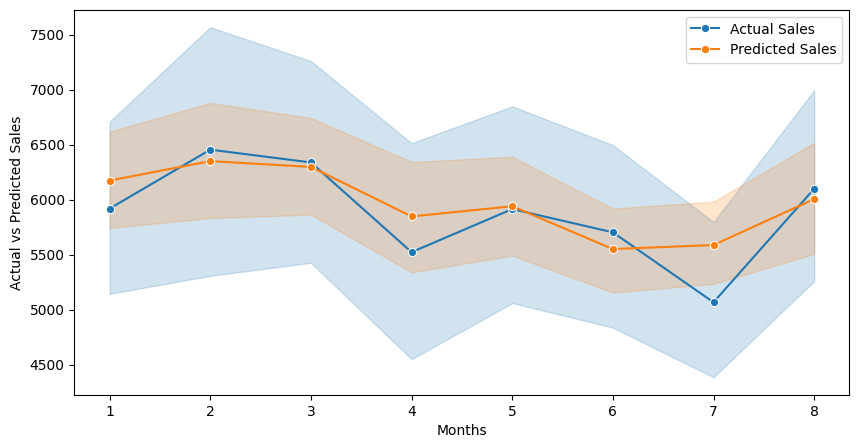

In [40]:
plt.figure(figsize=(10,5))

sns.lineplot(
    data=plot_df,
    x="Month",
    y="Actual",
    marker='o',
    label="Actual Sales",
)

sns.lineplot(
    data=plot_df,
    x="Month",
    y="Predicted",
    marker='o',
    label="Predicted Sales",
)

plt.ylabel('Actual vs Predicted Sales')
plt.xlabel('Months')

In [41]:
### Evaluate Model performance